In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

In [59]:
#Import the .wav audio
f = 'Amir.wav'
#s = sampling (int)
#a = audio signal (numpy array)
s,a = wavfile.read(f)
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

Sampling Rate: 48000
Audio Shape: (215040, 2)


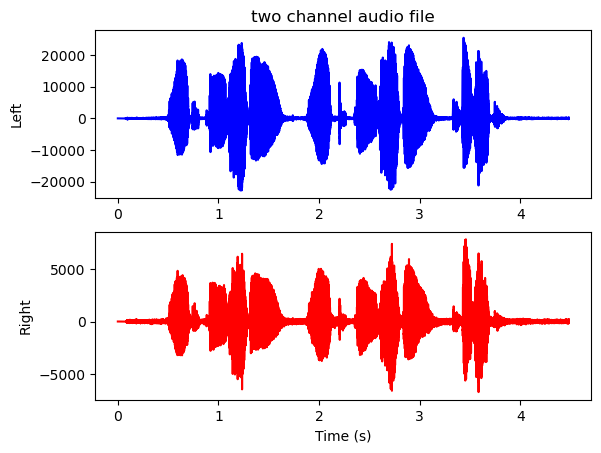

In [61]:

#number of samples
na = a.shape[0]
#audio time duration
la = na / s

#plot signal versus time
t = np.linspace(0,la,na)
plt.subplot(2,1,1)
plt.title("two channel audio file")
plt.plot(t,a[:,0],'b-')
plt.ylabel('Left')
plt.subplot(2,1,2)
plt.plot(t,a[:,1],'r-')
plt.ylabel('Right')
plt.xlabel('Time (s)')

plt.savefig("w1.png")
plt.show()

In [6]:
sound = AudioSegment.from_wav(f)
sound = sound.set_channels(1)
fm = f[:-4]+'_mono.wav'
sound.export(fm,format="wav")

<_io.BufferedRandom name='Amir_mono.wav'>

In [7]:
s,a = wavfile.read(fm)
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))

Sampling Rate: 48000
Audio Shape: (215040,)


/tmp/ipykernel_36604/1755376099.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


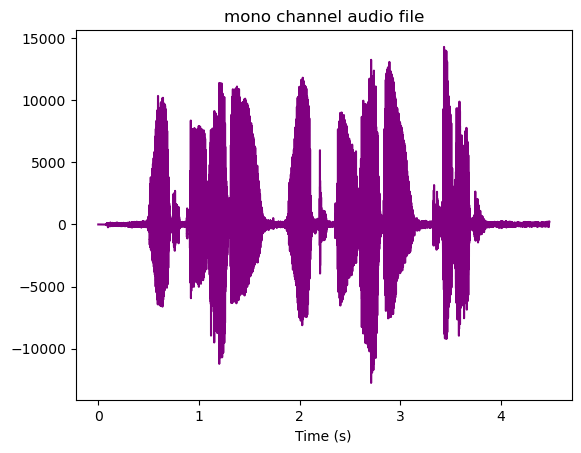

In [8]:
na = a.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.title("mono channel audio file")
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.savefig("w2.png")
plt.show()

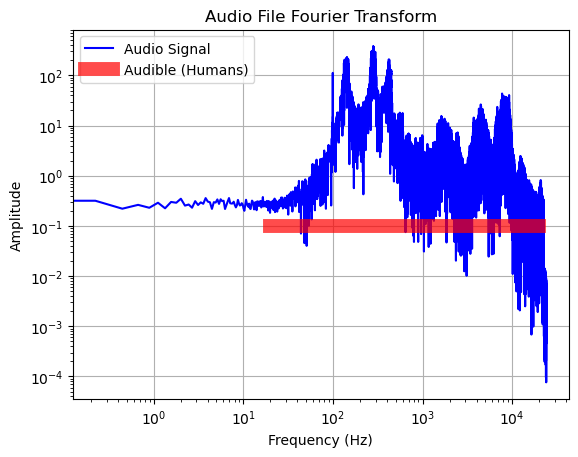

In [9]:
#analyze entire audio clip
na = len(a)
a_k = np.fft.fft(a)[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.title("Audio File Fourier Transform")
plt.plot(f,Pxx,'b-',label='Audio Signal')
plt.plot([20,20000],[0.1,0.1],'r-',alpha=0.7,\
         linewidth=10,label='Audible (Humans)')
ax.set_xscale('log'); ax.set_yscale('log')
plt.grid(); plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.savefig("w3.png")
plt.show()

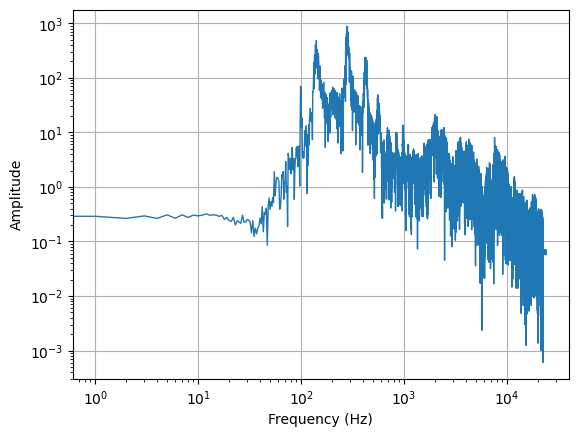

In [10]:
#first second clip
na = s
a_k = np.fft.fft(a[:na])[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=1)
ax.set_xscale('log'); ax.set_yscale('log')
plt.ylabel('Amplitude'); plt.grid()
plt.xlabel('Frequency (Hz)')
plt.show()

/tmp/ipykernel_25584/13294526.py:2: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


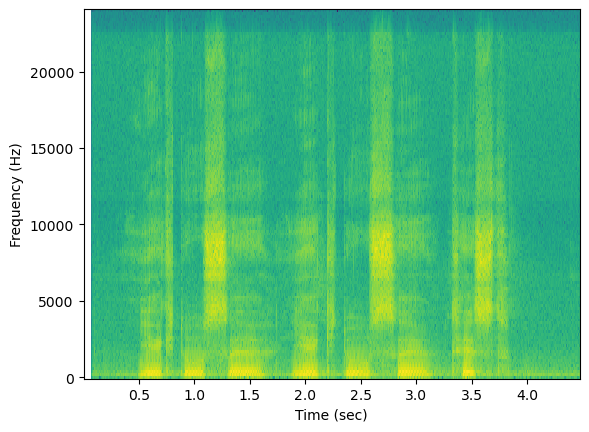

In [11]:
fr, tm, spgram = signal.spectrogram(a,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()


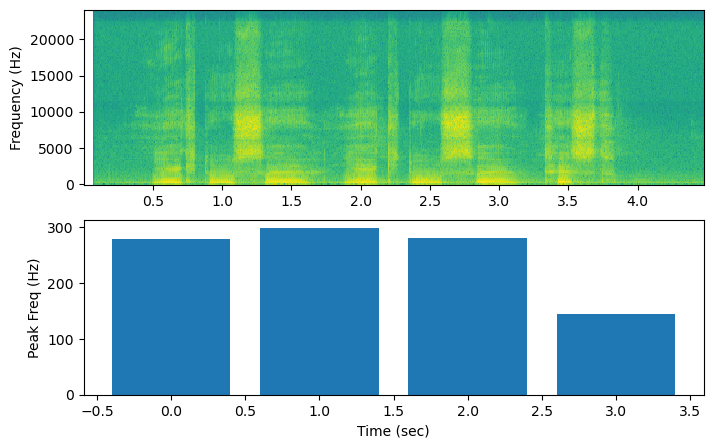

In [12]:
#analyze each sec of audio clip
nsec = int(np.floor(la))
pf = np.empty(nsec)
for i in range(nsec):
    audio = a[i*s:(i+1)*s]; na=len(audio) # use 48000 points with 48kHz
    a_k = np.fft.fft(audio)[0:int(na/2)]/na
    a_k[1:] = 2*a_k[1:]
    Pxx = np.abs(a_k)  
    f = s*np.arange((na/2))/na
    ipf = np.argmax(Pxx)
    pf[i] = f[ipf]

plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,1,2)
tb = np.arange(0,nsec)
plt.bar(tb,pf)
plt.xlabel('Time (sec)'); plt.ylabel('Peak Freq (Hz)')
plt.show()


In [11]:
# Generate random noise
noise = 1000*np.random.uniform(-1, 1, len(a))

# Add noise to the audio signal
noisy_audio = a + noise

# Save the noisy audio as a new file
noisy_fm = fm[:-4] + '_noisy.wav'
wavfile.write(noisy_fm, s, noisy_audio)


In [12]:
# Generate random noise
noise = 200*np.random.uniform(-1, 1, len(a))

# Add noise to the audio signal
noisy_audio2 = a + noise

# Save the noisy audio as a new file
noisy_fm = fm[:-4] + '_noisy5.wav'
wavfile.write(noisy_fm, s, noisy_audio)

/tmp/ipykernel_36604/1909400421.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t, noisy_audio, 'k-', color='purple')


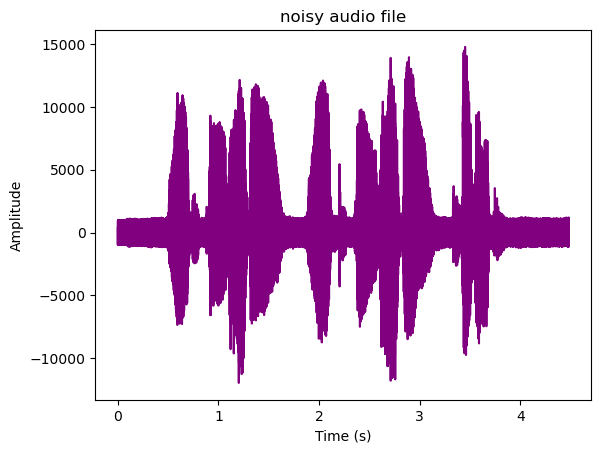

In [13]:
plt.title("noisy audio file")
plt.plot(t, noisy_audio, 'k-', color='purple')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig("w4.png")
plt.show()


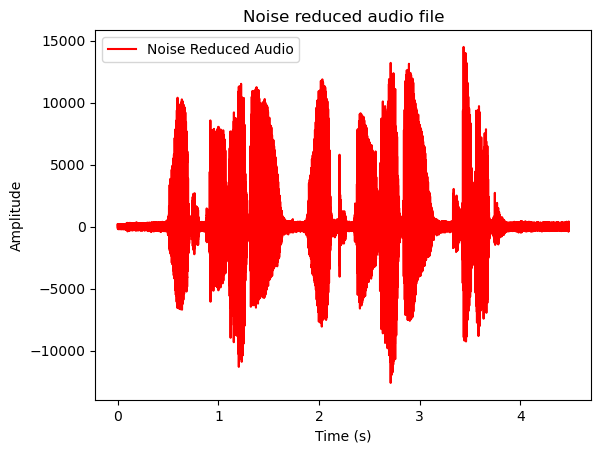

In [22]:
plt.title("Noise reduced audio file")
#plt.plot(t, noisy_audio, 'g-', label='Noisy Audio')
plt.plot(t, noisy_audio2, 'r-', label='Noise Reduced Audio')
#plt.plot(t, a, 'b-', label='Mono Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("w9.png")
plt.show()


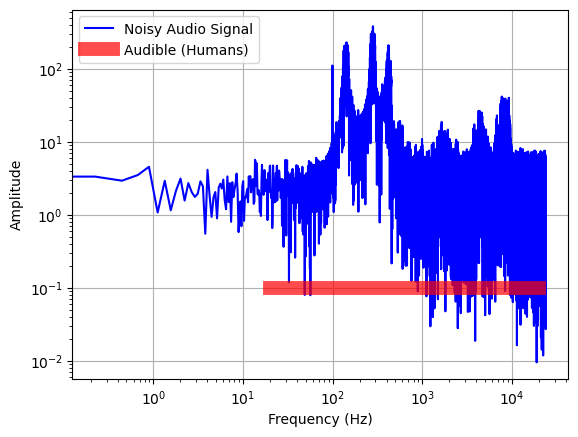

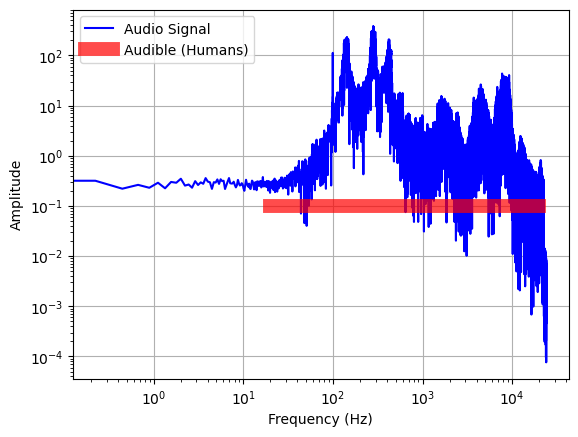

In [28]:
na_noisy = len(noisy_audio)
a_k_noisy = np.fft.fft(noisy_audio)[0:int(na_noisy/2)]/na_noisy
a_k_noisy[1:] = 2*a_k_noisy[1:]
Pxx_noisy = np.abs(a_k_noisy)
f_noisy = s*np.arange((na_noisy/2))/na_noisy

# plotting
fig, ax = plt.subplots()
plt.plot(f_noisy, Pxx_noisy, 'b-', label='Noisy Audio Signal')
plt.plot([20, 20000], [0.1, 0.1], 'r-', alpha=0.7, linewidth=10, label='Audible (Humans)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid()
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.show()
na = len(a)
a_k = np.fft.fft(a)[0:int(na/2)]/na # FFT function from numpy
a_k[1:] = 2*a_k[1:] # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na # frequency vector

#plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,'b-',label='Audio Signal')
plt.plot([20,20000],[0.1,0.1],'r-',alpha=0.7,\
         linewidth=10,label='Audible (Humans)')
ax.set_xscale('log'); ax.set_yscale('log')
plt.grid(); plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')

plt.show()

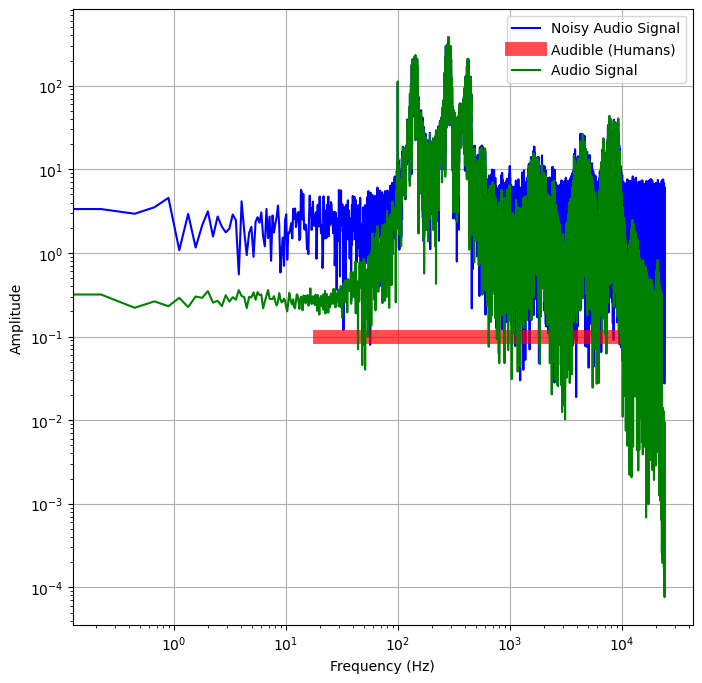

In [34]:
# Create a single ax
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting the first subplot
ax.plot(f_noisy, Pxx_noisy, 'b-')
ax.plot([20, 20000], [0.1, 0.1], 'r-', alpha=0.7, linewidth=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_ylabel('Amplitude')
ax.set_xlabel('Frequency (Hz)')

# Plotting the second subplot
ax.plot(f, Pxx, 'g-')  # Change the color to green
ax.legend(['Noisy Audio Signal',"Audible (Humans)","Audio Signal"])  # Add legend
plt.show()


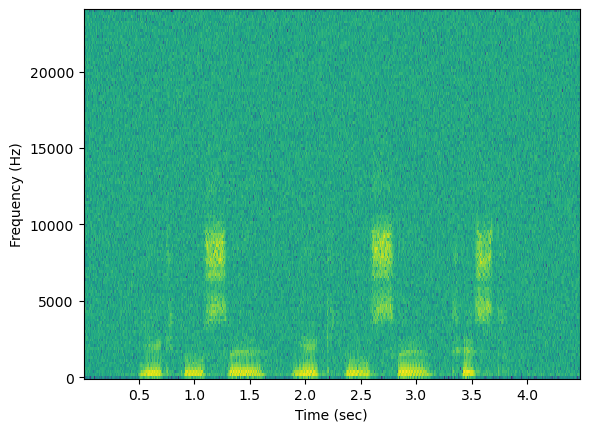

In [35]:
fr, tm, spgram = signal.spectrogram(noisy_audio, s)
lspg = np.log(spgram)
plt.pcolormesh(tm, fr, lspg, shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

/tmp/ipykernel_25584/3138809093.py:2: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


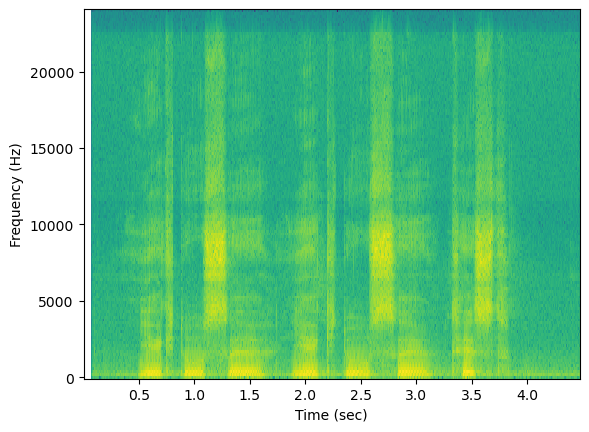

In [36]:
fr, tm, spgram = signal.spectrogram(a,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [102]:
import numpy as np
from scipy.fft import fft, ifft

def noise_reduction(signal, window_size, threshold):
    # Apply Fourier transform to the signal
    spectrum = fft(signal)
    
    # Normalize the spectrum
    normalized_spectrum = spectrum / len(spectrum)
    
    # Apply sliding window frequency threshold noise filtering
    filtered_spectrum = np.copy(normalized_spectrum)
    for i in range(window_size, len(filtered_spectrum) - window_size):
        window = filtered_spectrum[i - window_size:i + window_size]
        window_mean = np.mean(window)
        if window_mean < threshold:
            filtered_spectrum[i] = 0
    
    # Apply inverse Fourier transform to get the denoised signal
    denoised_signal = ifft(len(spectrum)*filtered_spectrum)
    
    return np.real(denoised_signal)


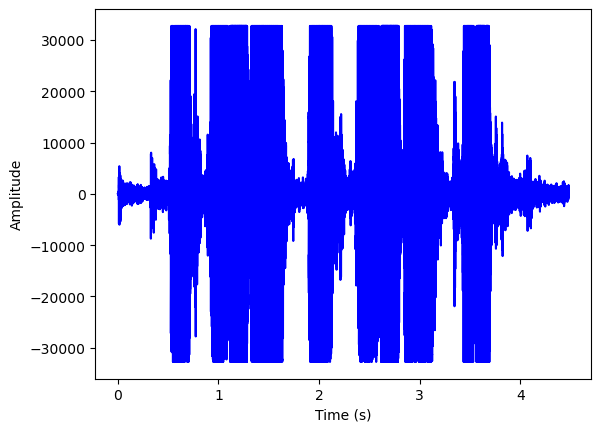

In [24]:
# Read the audio file
s, audio = wavfile.read('Amir_mono_noisy_out.wav')

# Create the time array
t = np.linspace(0, len(audio) / s, len(audio))

# Plot the audio
plt.plot(t, audio, 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()



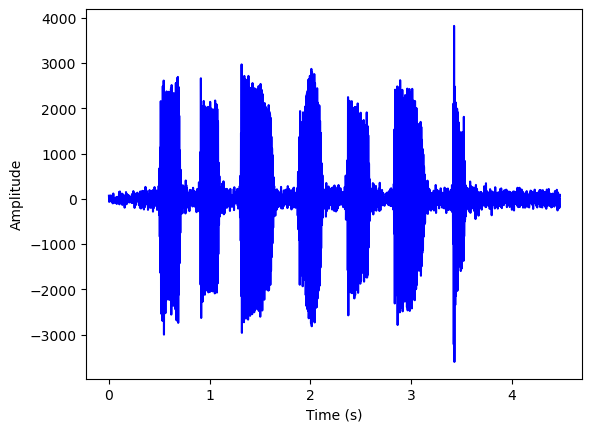

In [131]:
# Set the parameters for noise reduction
window_size = 1000
threshold = 1000

# Perform noise reduction
denoised_audio = noise_reduction(noisy_audio, window_size, threshold)

# Save the denoised audio as a new file
denoised_file = 'denoised_audio.wav'
wavfile.write(denoised_file, s, 4*denoised_audio)


t = np.linspace(0, len(denoised_audio) / s, len(denoised_audio))
plt.plot(t, denoised_audio, 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()



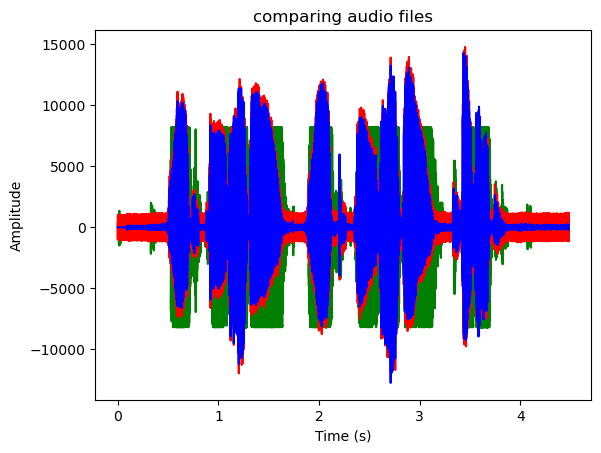

In [34]:
plt.title("comparing audio files")

plt.plot(t, audio/4, 'g-', label='Noise Reduced Audio')

# Plotting the noisy audio
plt.plot(t, noisy_audio, 'r-', label='Noisy Audio')

# Plotting the mono file
plt.plot(t, a, 'b-', label='Mono Audio')

# Plotting the denoised file


plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig("w9.png")
plt.show()


/home/alireza-astane/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


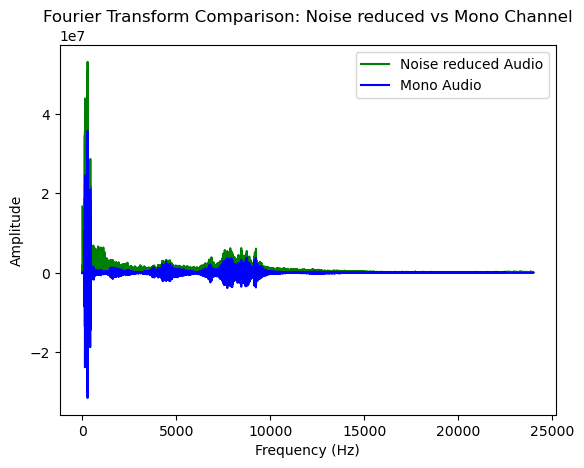

In [38]:
# Compute the FFT of the mono audio
mono_fft = np.fft.fft(a)
mono_fft = (mono_fft[:len(mono_fft)//2])

# Compute the FFT of the noisy audio
noisy_fft = np.fft.fft(noisy_audio)
noisy_fft = np.abs(noisy_fft[:len(noisy_fft)//2])

# Compute the FFT of the denoised audio
denoised_fft = np.fft.fft(audio)
denoised_fft = np.abs(denoised_fft[:len(denoised_fft)//2])

# Plotting

plt.title("Fourier Transform Comparison: Noise reduced vs Mono Channel")
plt.plot(f, denoised_fft/5, 'g-', label='Noise reduced Audio')
plt.plot(f, mono_fft, 'b-', label='Mono Audio')
#plt.plot(f, noisy_fft, 'r-', label='Noisy Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig("w10.png")
plt.show()


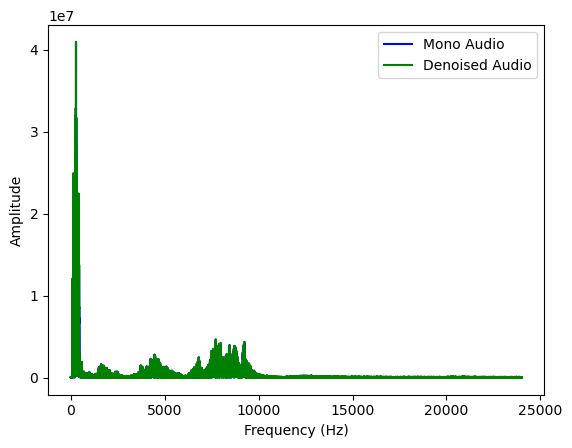

In [203]:
# Compute the FFT of the mono audio
mono_fft = np.fft.fft(a)
mono_fft = np.abs(mono_fft[:len(mono_fft)//2])


# Compute the FFT of the denoised audio
denoised_fft = np.fft.fft(noisy_audio2)
denoised_fft = np.abs(denoised_fft[:len(noisy_audio2)//2])

# Plotting
plt.plot(f, mono_fft, 'b-', label='Mono Audio')
plt.plot(f, denoised_fft, 'g-', label='Denoised Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


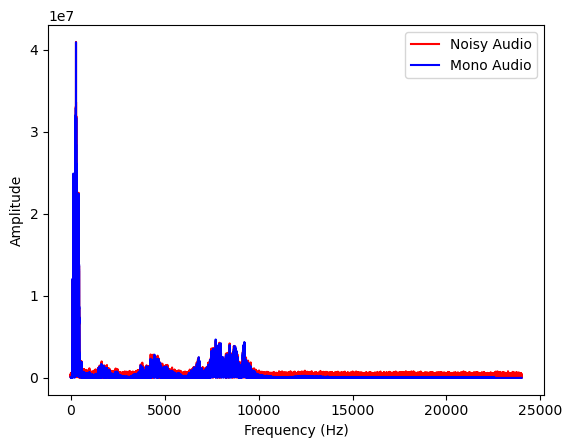

In [135]:
# Compute the FFT of the mono audio
mono_fft = np.fft.fft(a)
mono_fft = np.abs(mono_fft[:len(mono_fft)//2])

# Compute the FFT of the noisy audio
noisy_fft = np.fft.fft(noisy_audio)
noisy_fft = np.abs(noisy_fft[:len(noisy_fft)//2])

# Plotting
plt.plot(f, noisy_fft, 'r-', label='Noisy Audio')
plt.plot(f, mono_fft, 'b-', label='Mono Audio')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [166]:
import numpy as np
from scipy.fft import fft, ifft

def filter_audio(audio, lower_threshold, upper_threshold):
    # Perform FFT on the audio array
    spectrum = fft(audio)
    
    # Get the frequency vector
    filtered_spectrum = np.copy(spectrum)
    filtered_spectrum[:lower_threshold] = 0
    filtered_spectrum[upper_threshold:] = 0
    
    # Perform inverse FFT to get the filtered audio array
    filtered_audio = ifft(filtered_spectrum)
    
    # Return the real part of the filtered audio array
    return np.real(filtered_audio)


In [167]:
fft(noisy_audio).shape

(215040,)

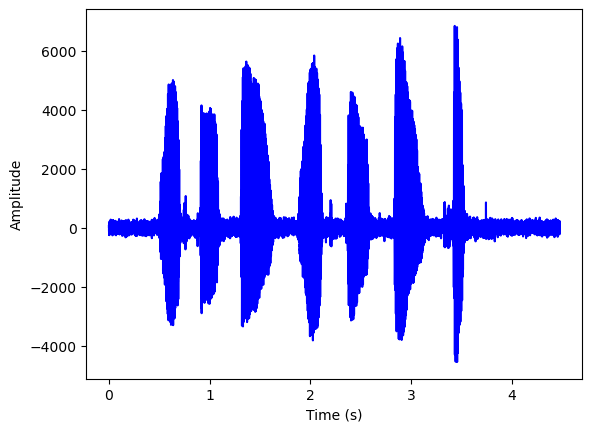

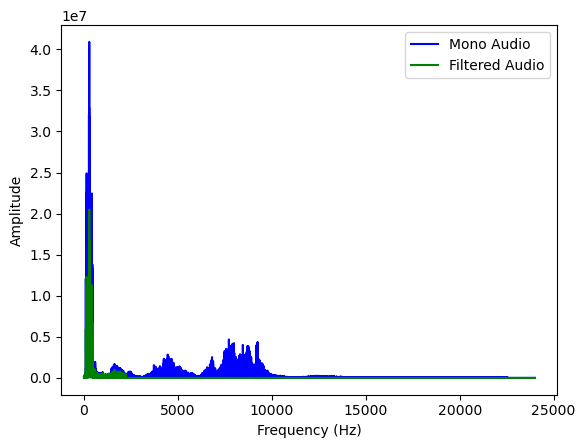

In [168]:
# Set the file path for the filtered audio
filtered_file = 'filtered_audio.wav'

# Save the filtered audio as a new file

# Set the lower and upper frequency thresholds
lower_threshold = 1
upper_threshold = 10000

# Apply the filter to the noisy audio
filtered_audio = filter_audio(noisy_audio, lower_threshold, upper_threshold)
wavfile.write(filtered_file, s, filtered_audio)
# Plot the filtered audio
t = np.linspace(0, len(filtered_audio) / s, len(filtered_audio))
plt.plot(t, filtered_audio, 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Compute the FFT of the mono audio
mono_fft = np.fft.fft(a)
mono_fft = np.abs(mono_fft[:len(mono_fft)//2])

# Compute the FFT of the noisy audio
noisy_fft = np.fft.fft(noisy_audio)
noisy_fft = np.abs(noisy_fft[:len(noisy_fft)//2])

# Compute the FFT of the filtered audio
filtered_fft = np.fft.fft(filtered_audio)
filtered_fft = np.abs(filtered_fft[:len(filtered_fft)//2])

# Plotting

plt.plot(f, mono_fft, 'b-', label='Mono Audio')
plt.plot(f, filtered_fft, 'g-', label='Filtered Audio')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


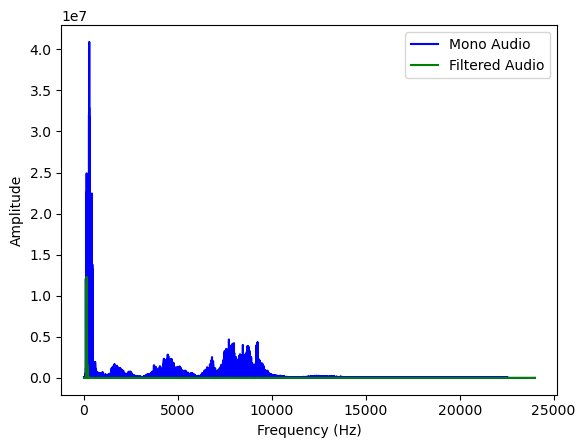

In [159]:
# Compute the FFT of the mono audio
mono_fft = np.fft.fft(a)
mono_fft = np.abs(mono_fft[:len(mono_fft)//2])

# Compute the FFT of the noisy audio
noisy_fft = np.fft.fft(noisy_audio)
noisy_fft = np.abs(noisy_fft[:len(noisy_fft)//2])

# Compute the FFT of the filtered audio
filtered_fft = np.fft.fft(filtered_audio)
filtered_fft = np.abs(filtered_fft[:len(filtered_fft)//2])

# Plotting
plt.plot(f, noisy_fft, 'r-', label='Noisy Audio')
plt.plot(f, mono_fft, 'b-', label='Mono Audio')
plt.plot(f, filtered_fft, 'g-', label='Filtered Audio')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

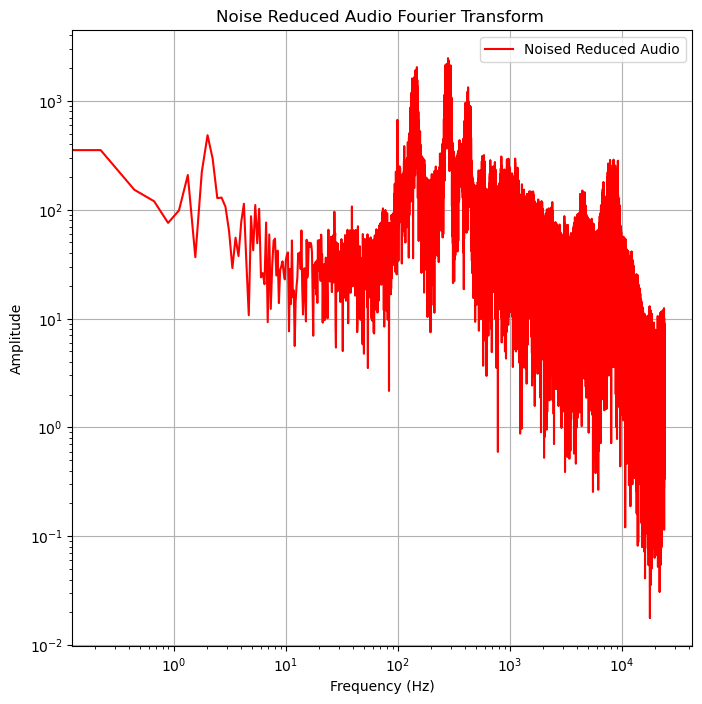

In [56]:
na_noisy = len(noisy_audio)
a_k_noisy = np.fft.fft(noisy_audio)[0:int(na_noisy/2)]/na_noisy
a_k_noisy[1:] = 2*a_k_noisy[1:]
Pxx_noisy = np.abs(a_k_noisy)
f_noisy = s*np.arange((na_noisy/2))/na_noisy


na_nr = len(audio)
a_k_nr = np.fft.fft(audio)[0:int(na_nr/2)]/na_nr
a_k_nr[1:] = 2*a_k_nr[1:]
Pxx_nr = np.abs(a_k_nr)
f_nr = s*np.arange((na_nr/2))/na_nr


# Create a single ax
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting the first subplot
#ax.plot(f_noisy, Pxx_noisy, 'b-',label="Noisy Audio")
ax.plot(f_nr, Pxx_nr, 'r-',label="Noised Reduced Audio")
#ax.plot(f, Pxx, 'g-',label="Mono Channel Audio")  # Change the color to green

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.set_ylabel('Amplitude')
ax.set_xlabel('Frequency (Hz)')

# Plotting the second subplot
ax.legend()  # Add legend


plt.title("Noise Reduced Audio Fourier Transform ")
plt.savefig("w16.png")
plt.show()
